In [1]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style 
import seaborn as sns

In [2]:
df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")
df.head()

C:\Users\bhumi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [3]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [4]:
df.shape

(300698, 53)

In [5]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [6]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [7]:
df.isnull()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,False,False,True,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
300694,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
300695,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
300696,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False


In [8]:
df[["Created Date"]]

,Created Date
0,12/31/2015 11:59:45 PM
1,12/31/2015 11:59:44 PM
2,12/31/2015 11:59:29 PM
3,12/31/2015 11:57:46 PM
4,12/31/2015 11:56:58 PM
...,...
300693,03/29/2015 12:33:41 AM
300694,03/29/2015 12:33:28 AM
300695,03/29/2015 12:33:03 AM
300696,03/29/2015 12:33:02 AM


In [9]:
df[["Closed Date"]]

,Closed Date
0,01-01-16 0:55
1,01-01-16 1:26
2,01-01-16 4:51
3,01-01-16 7:43
4,01-01-16 3:24
...,...
300693,NaN
300694,03/29/2015 02:33:59 AM
300695,03/29/2015 03:40:20 AM
300696,03/29/2015 04:38:35 AM


In [10]:
import datetime

In [11]:
df= pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", parse_dates= ["Created Date","Closed Date"])

C:\Users\bhumi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
df["Request_Closing_Time"] = df["Closed Date"]- df["Created Date"]

<AxesSubplot:>

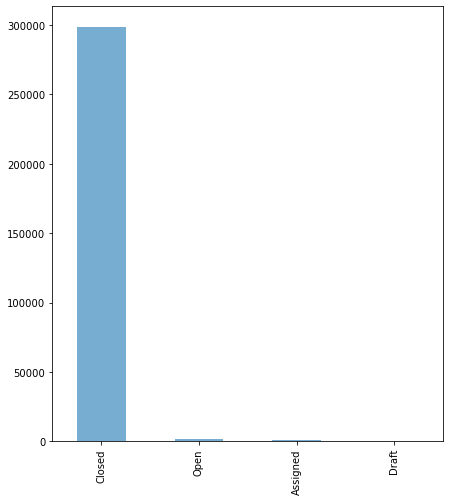

In [13]:
df['Status'].value_counts().plot(kind='bar', alpha=0.6, figsize = (7,8))

In [14]:
df["Request_Closing_Time"]=(df["Closed Date"]-df["Created Date"])

Request_Closing_Time=[]
for x in (df["Closed Date"]-df["Created Date"]):
    close=x.total_seconds()/60
    Request_Closing_Time.append(close)
    
df["Request_Closing_Time"]=Request_Closing_Time

In [15]:
print("Total Number of Concerns : ",len(df),"\n")
print("Percentage of Requests took less than 100 hour to get solved   : ",round((len(df)-(df["Request_Closing_Time"]>100).sum())/len(df)*100,2),"%")
print("Percentage of Requests took less than 1000 hour to get solved : ",round((len(df)-(df["Request_Closing_Time"]>1000).sum())/len(df)*100,2),"%")

Total Number of Concerns :  300698 

Percentage of Requests took less than 100 hour to get solved   :  33.32 %
Percentage of Requests took less than 1000 hour to get solved :  97.19 %


In [16]:
df["Request_Closing_Time"]

0          55.250000
1          86.266667
2         291.516667
3         465.233333
4         207.033333
             ...    
300693           NaN
300694    120.516667
300695    187.283333
300696    245.550000
300697    248.816667
Name: Request_Closing_Time, Length: 300698, dtype: float64

In [17]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [18]:
df["Agency"].unique()

array(['NYPD'], dtype=object)

C:\Users\bhumi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


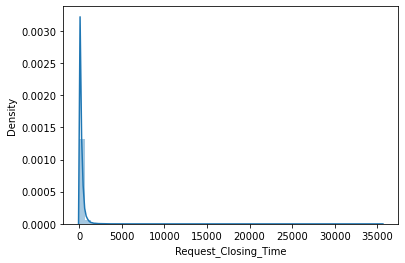

In [19]:
sns.distplot(df["Request_Closing_Time"])
plt.show()

C:\Users\bhumi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


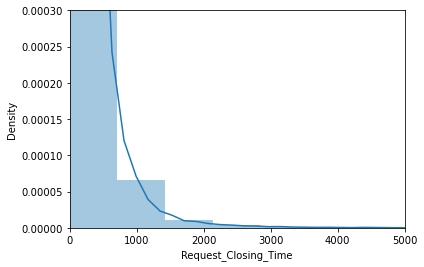

In [20]:
sns.distplot(df["Request_Closing_Time"])
plt.xlim((0, 5000))
plt.ylim((0, 0.0003))
plt.show()

<AxesSubplot:>

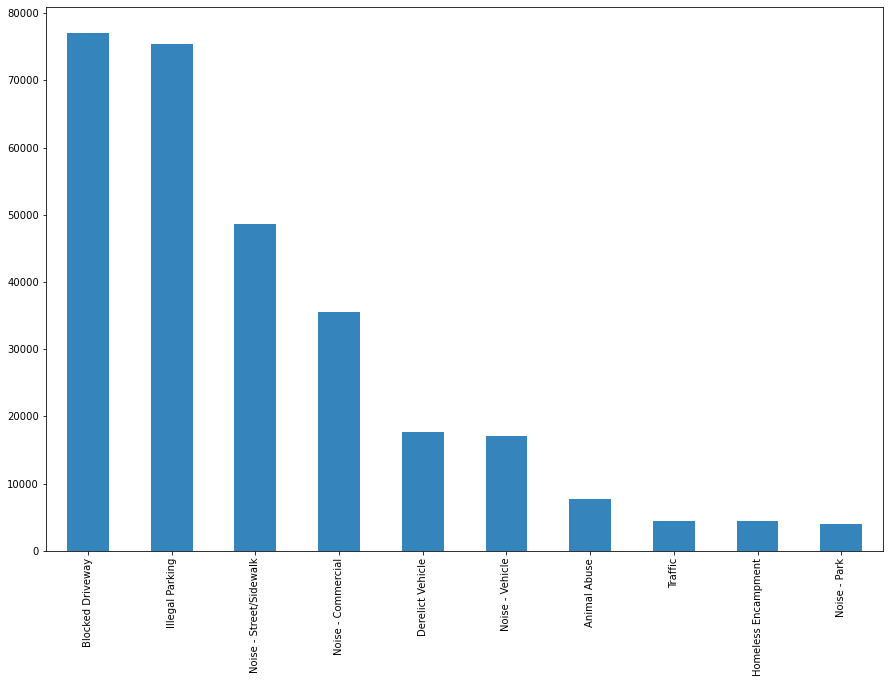

In [21]:
df['Complaint Type'].value_counts()[:10].plot(kind='bar', alpha=0.9, figsize=(15,10))

In [22]:
df["Complaint Type"].value_counts()[:10]

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Noise - Vehicle            17083
Animal Abuse                7778
Traffic                     4498
Homeless Encampment         4416
Noise - Park                4042
Name: Complaint Type, dtype: int64

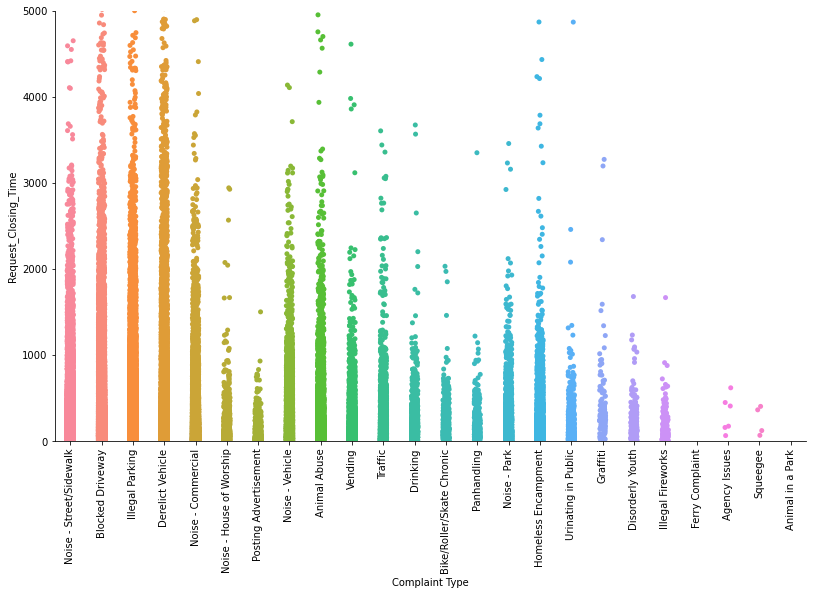

In [23]:
a= sns.catplot(x= 'Complaint Type', y="Request_Closing_Time", data = df)
a.fig.set_figwidth(15)
a.fig.set_figheight(7)
plt.xticks(rotation=90)
plt.ylim((0,5000))
plt.show()

In [24]:
for x in df["Borough"].unique():
    print("Percentage of Request from ", x, "Division:", round((df["Borough"]==x).sum()/len(df)*100))

Percentage of Request from  MANHATTAN Division: 22
Percentage of Request from  QUEENS Division: 27
Percentage of Request from  BRONX Division: 14
Percentage of Request from  BROOKLYN Division: 33
Percentage of Request from  Unspecified Division: 1
Percentage of Request from  STATEN ISLAND Division: 4


In [25]:
df["Location Type"].unique()

array(['Street/Sidewalk', 'Club/Bar/Restaurant', 'Store/Commercial',
       'House of Worship', 'Residential Building/House',
       'Residential Building', 'Park/Playground', 'Vacant Lot',
       'House and Store', 'Highway', 'Commercial', 'Roadway Tunnel',
       'Subway Station', 'Parking Lot', 'Bridge', 'Terminal', nan,
       'Ferry', 'Park'], dtype=object)

In [26]:
pd.DataFrame(df.groupby("Location Type")["Request_Closing_Time"].mean()).sort_values("Request_Closing_Time")

,Request_Closing_Time
Location Type,
Subway Station,142.250980
Club/Bar/Restaurant,186.074330
House of Worship,191.833279
Store/Commercial,198.089073
Park/Playground,207.137129
Highway,223.424221
Bridge,229.158333
Roadway Tunnel,266.525714
Street/Sidewalk,268.515306


In [27]:
pd.DataFrame(df.groupby("City")["Request_Closing_Time"].mean()).sort_values("Request_Closing_Time")

,Request_Closing_Time
City,
ARVERNE,135.895606
ROCKAWAY PARK,139.133736
LITTLE NECK,154.660316
OAKLAND GARDENS,157.853146
BAYSIDE,160.759992
FAR ROCKAWAY,167.399774
NEW YORK,178.357371
FLUSHING,181.081826
FOREST HILLS,193.449032


In [28]:
pd.DataFrame((df.isnull().sum()/ df.shape[0]*100)).sort_values(0, ascending=False)[:20]

,0
School or Citywide Complaint,100.000000
Garage Lot Name,100.000000
Vehicle Type,100.000000
Taxi Pick Up Location,100.000000
Taxi Company Borough,100.000000
Ferry Direction,99.999667
Ferry Terminal Name,99.999335
Road Ramp,99.929165
Bridge Highway Segment,99.929165
Bridge Highway Direction,99.919188


In [29]:
cols= len(df.axes[1])

print("No: of columns", cols)

No: of columns 54


In [30]:
df1= df.loc[:,(df.isnull().sum()/df.shape[0]*100)<=50]

In [31]:
print("old data:", df.shape)

print("New data :", df1.shape)

old data: (300698, 54)
New data : (300698, 40)


In [32]:
remaining= []
for x in df1.columns.tolist():
    if df1[x].nunique()<=3:
        print(x+" "*10+":", df1[x].unique())
        remaining.append(x)

Agency          : ['NYPD']
Agency Name          : ['New York City Police Department' 'NYPD' 'Internal Affairs Bureau']
Facility Type          : ['Precinct' nan]
Park Facility Name          : ['Unspecified' 'Alley Pond Park - Nature Center']
School Name          : ['Unspecified' 'Alley Pond Park - Nature Center']
School Number          : ['Unspecified' 'Q001']
School Region          : ['Unspecified' nan]
School Code          : ['Unspecified' nan]
School Phone Number          : ['Unspecified' '7182176034']
School Address          : ['Unspecified' 'Grand Central Parkway, near the soccer field']
School City          : ['Unspecified' 'QUEENS']
School State          : ['Unspecified' 'NY']
School Zip          : ['Unspecified' nan]
School Not Found          : ['N']


In [33]:
df1.shape

(300698, 40)

In [34]:
df1.drop(remaining, axis=1, inplace=True)

C:\Users\bhumi\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
df1.shape

(300698, 26)

In [36]:
df1.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",55.250000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",86.266667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",291.516667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",465.233333
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",207.033333


(0.0, 2000.0)

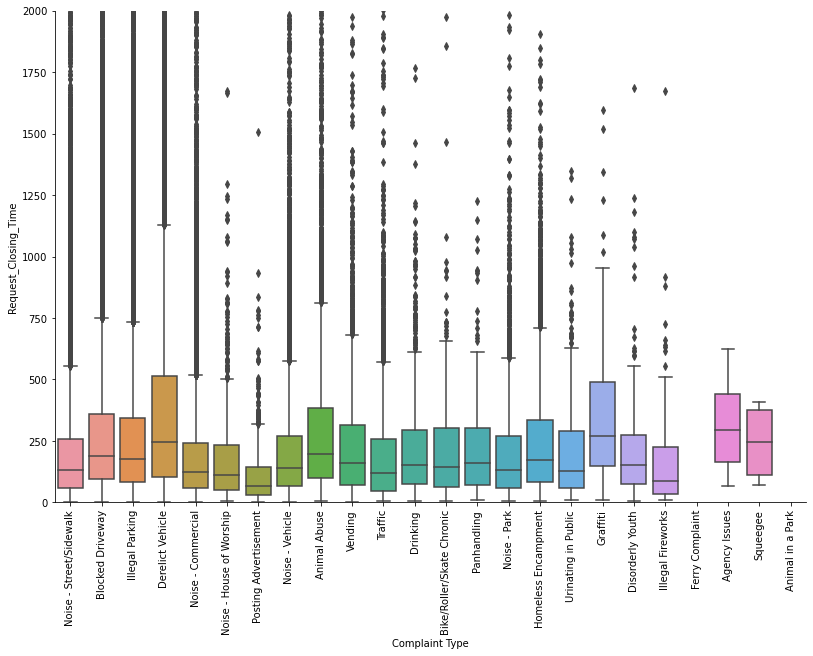

In [37]:
h= sns.catplot(x="Complaint Type", y= "Request_Closing_Time", kind= "box", data=df1)
h.fig.set_figheight(8)
h.fig.set_figwidth(15)
plt.xticks(rotation=90)
plt.ylim((0,2000))

In [38]:
anova_df= pd.DataFrame()
anova_df["Request_Closing_Time"]= df1["Request_Closing_Time"]
anova_df["Complaint"]= df1["Complaint Type"]

anova_df.dropna(inplace=True)
anova_df.head()

,Request_Closing_Time,Complaint
0,55.250000,Noise - Street/Sidewalk
1,86.266667,Blocked Driveway
2,291.516667,Blocked Driveway
3,465.233333,Illegal Parking
4,207.033333,Illegal Parking


In [52]:
from scipy import stats
from scipy.stats import chi2_contingency



In [41]:
pip install --upgrade --no-deps statsmodels

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [46]:
lm = ols("Request_Closing_Time~Complaint", data=anova_df).fit()
table= sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Complaint,22.0,1.455049e+09,6.613860e+07,514.177089,0.0
Residual,298511.0,3.839747e+10,1.286300e+05,NaN,NaN


In [48]:
chi_sq=pd.DataFrame()
chi_sq["Location Type"]= df1["Location Type"]
chi_sq["Complaint Type"]= df1["Complaint Type"]


chi_sq.dropna(inplace=True)

In [50]:
data_crosstab= pd.crosstab(chi_sq["Location Type"], chi_sq["Complaint Type"])

In [55]:
stat , p , dof,  expected = chi2_contingency(data_crosstab)

alpha = 0.05
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent(H0 holds ture)')

Dependent (reject H0)
